Convolutional Neural Network (CNN) using Keras to classify images from a popular dataset like CIFAR-10

In [22]:
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical  # Added this import
import matplotlib.pyplot as plt
from keras import layers
from keras.models import Sequential

In [23]:
# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [24]:
# Build the CNN model
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.5278 - accuracy: 0.4404 - val_loss: 1.2797 - val_accuracy: 0.5442
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1672 - accuracy: 0.5874 - val_loss: 1.1291 - val_accuracy: 0.5984
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0104 - accuracy: 0.6466 - val_loss: 1.0353 - val_accuracy: 0.6340
Epoch 4/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.9064 - accuracy: 0.6827 - val_loss: 0.9761 - val_accuracy: 0.6611
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8387 - accuracy: 0.7073 - val_loss: 0.9281 - val_accuracy: 0.6755
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7820 - accuracy: 0.7255 - val_loss: 0.9184 - val_accuracy: 0.6881
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7327 - accuracy: 0.7439 - val_loss: 0.8907 -

In [27]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 4s 12ms/step - loss: 0.9021 - accuracy: 0.7065
Test accuracy: 0.7064999938011169


In [28]:
# Rest of the code for visualization and prediction
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

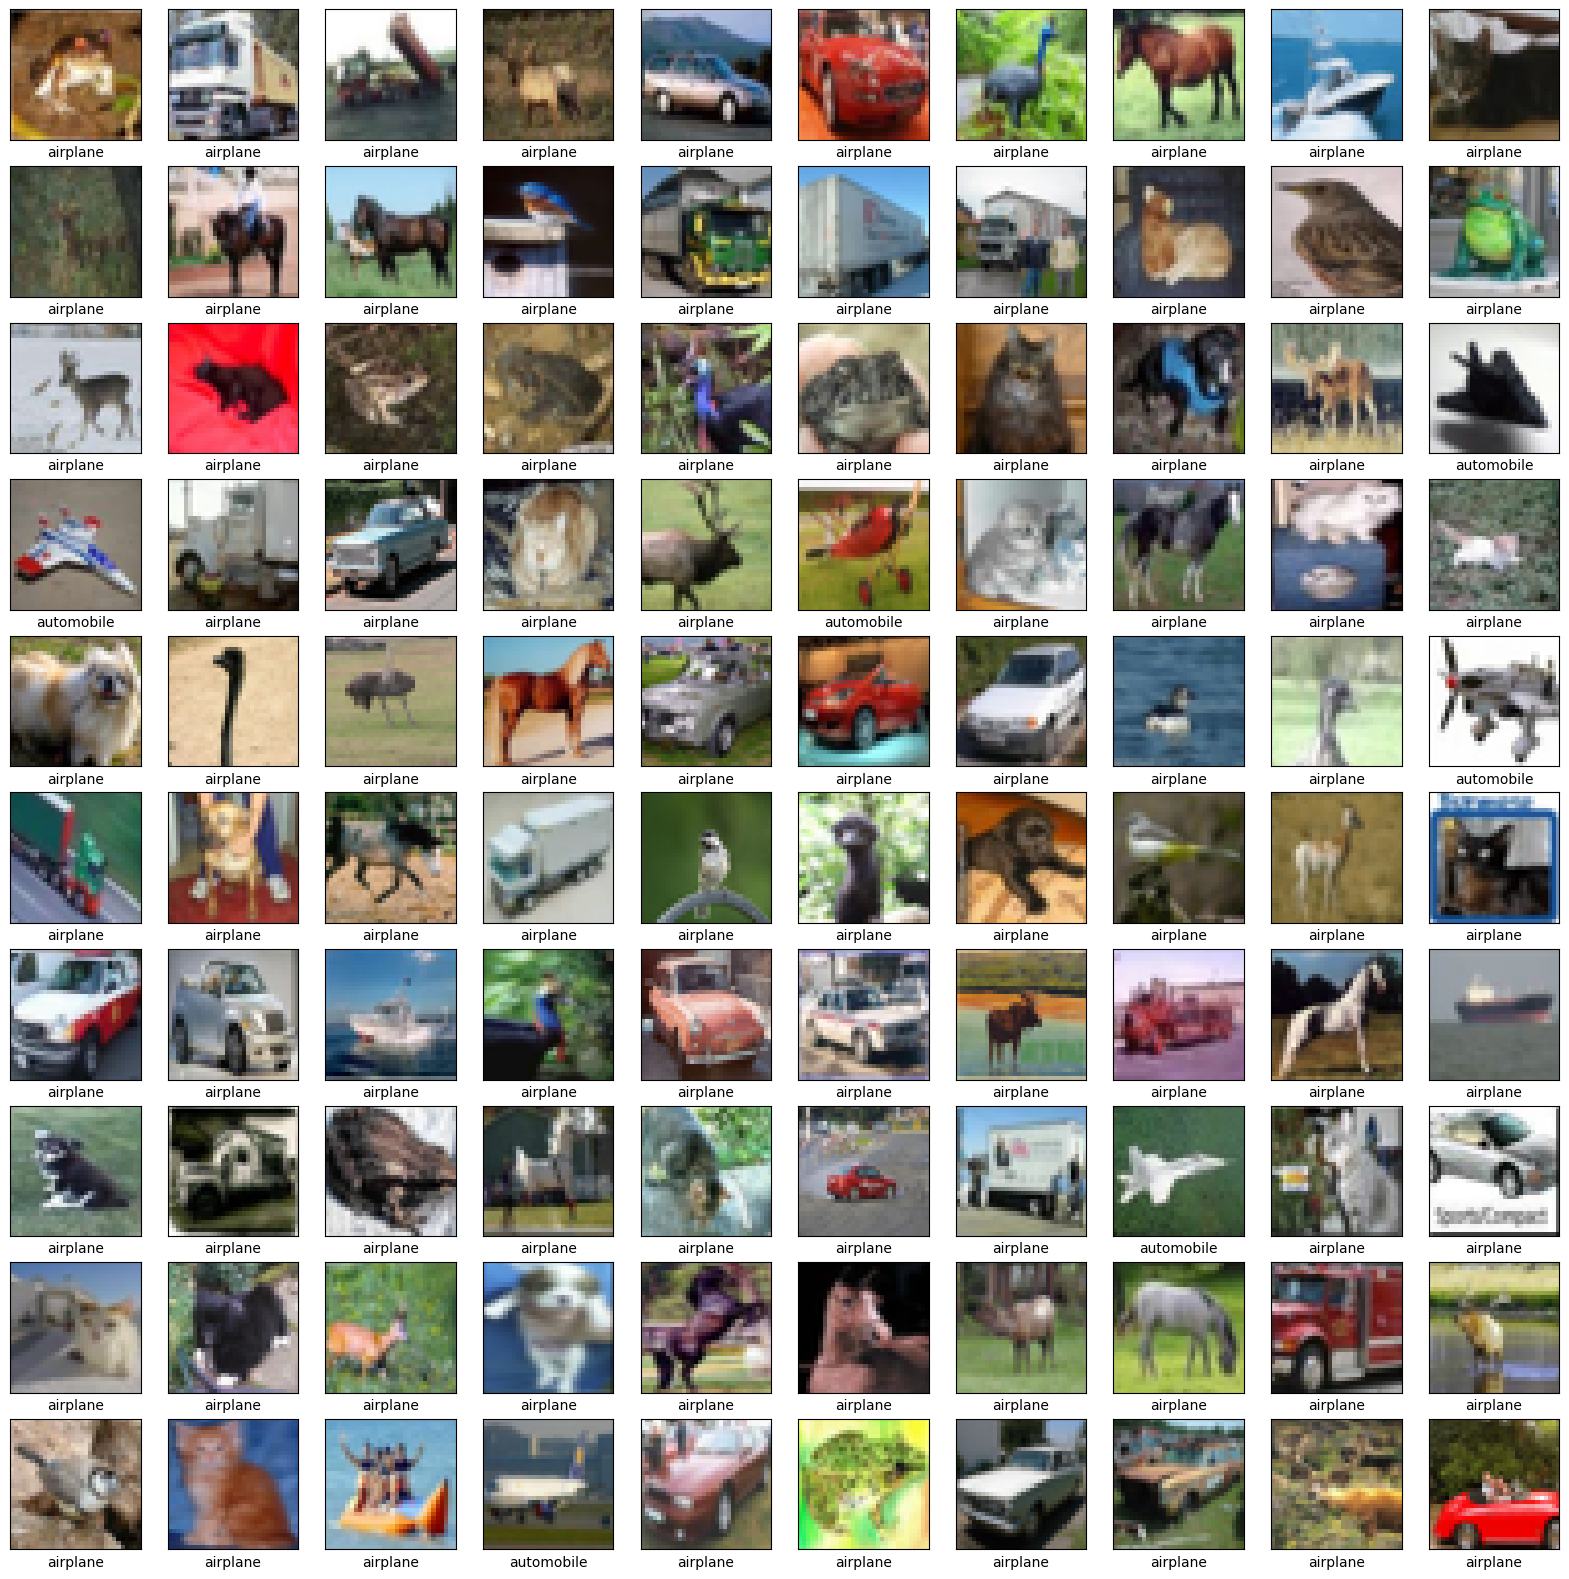

In [29]:
# Visualizing the dataset to understand better what to do
plt.figure(figsize=[20, 20])
for i in range (100):
  plt.subplot(10, 10, i+1) # 10 * 10 different images
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(classes[int(train_labels[i][0])])

plt.show()

In [30]:
model = Sequential() # declare the model

# Feature Learning Parts
model.add(layers.Conv2D(32, (3,3), padding = "same", activation = "relu", input_shape=(32,32,3))) # started with "32" because of the image size is 32*32
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding = "same", activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

# Classification Parts
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(classes), activation = "softmax")) # softmax instead of relu because we need the probabilities, and binary (like "0-1" such as relu) is useless here

# Checking the model in a structured way, can also be visualized with tensorboard
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [32]:
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

history = model.fit(train_images, train_labels, batch_size=64, epochs=1,
                    validation_data=(test_images, test_labels))

782/782 [==============================] - 325s 411ms/step - loss: 1.5923 - accuracy: 0.4510 - val_loss: 1.1176 - val_accuracy: 0.5997


In [33]:
# Predict
pred = model.predict(test_images)
print(pred)

# Turn predictions into indexes
pred_classes = np.argmax(pred, axis = 1)
print(pred_classes)

313/313 [==============================] - 17s 55ms/step
[[1.1554240e-02 6.7083659e-03 1.6007582e-02 ... 7.4190497e-03
  3.0099028e-01 1.9980464e-02]
 [8.6550988e-02 2.1029790e-01 6.0310911e-05 ... 7.1472946e-06
  6.9203937e-01 1.0844468e-02]
 [4.9269471e-02 1.1016716e-01 1.6633585e-03 ... 5.6370406e-04
  7.7790087e-01 5.2384268e-02]
 ...
 [2.5146692e-03 9.7851118e-04 8.2927346e-02 ... 9.6233025e-02
  1.3376153e-03 2.0173981e-03]
 [1.3044235e-01 1.7343505e-01 1.5287167e-01 ... 4.2810831e-02
  1.4119098e-02 5.9169880e-03]
 [1.4135021e-03 1.6245946e-03 4.1161650e-03 ... 7.4367553e-01
  9.5254480e-04 2.0070088e-03]]
[3 8 8 ... 5 4 7]


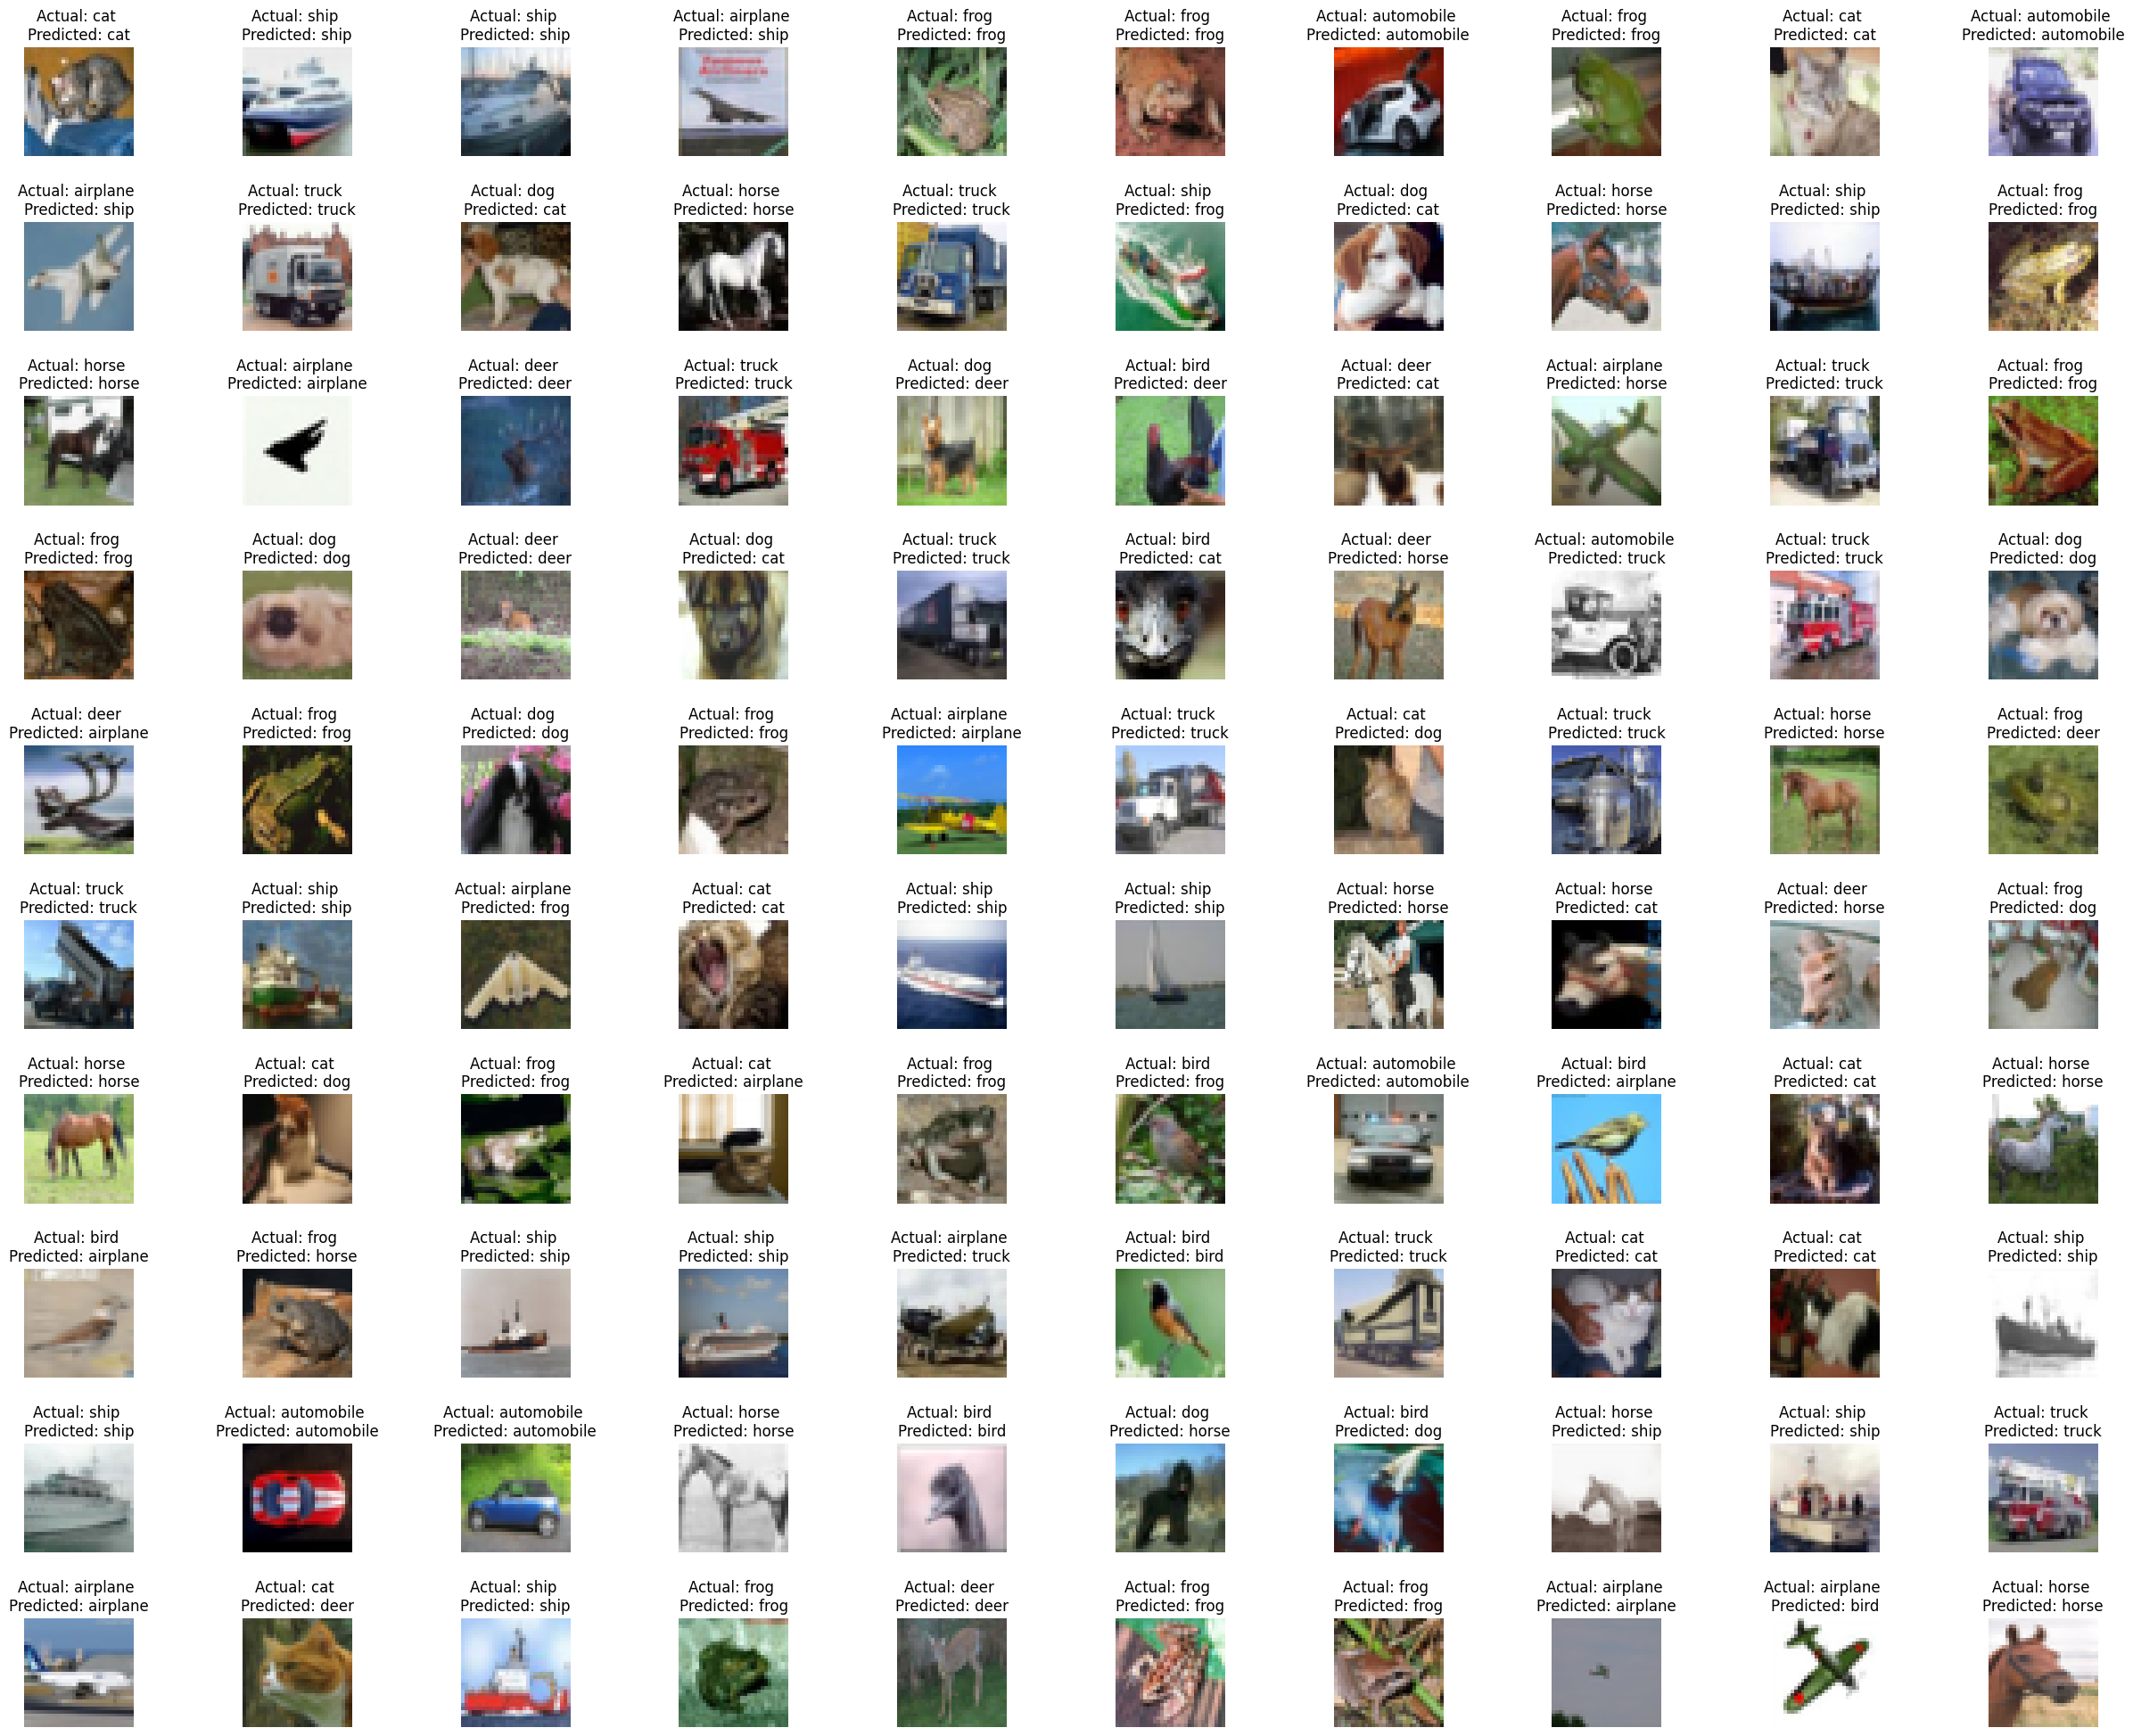

In [36]:
# Actual and Predicted visualization

fig, axes = plt.subplots(10, 10, figsize=(30,25))
axes = axes.ravel()

for i in np.arange(0, 100):
    axes[i].imshow(test_images[i])
    axes[i].set_title("Actual: %s \nPredicted: %s" % (classes[np.argmax(test_labels[i])], classes[pred_classes[i]]))
    axes[i].axis("off")
    plt.subplots_adjust(wspace=1)